# Customer Churn Prediction 🚀

# Phase 1: Data Preprocessing & Feature Engineering

Import Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    roc_auc_score, roc_curve
)

Load data

In [59]:
# Loading data
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Convert and Drop

In [60]:
# Convert 'TotalCharges' to numeric and drop missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# Drop 'customerID' as it's not useful for modeling
df.drop('customerID', axis=1, inplace=True)

Encode

In [61]:
# Encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [62]:
# One-hot encode remaining categorical columns
multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

Final

In [63]:
# Final shape and preview
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()

Encoded dataset shape: (7032, 31)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


# Phase 2: Exploratory Data Analysis (EDA)

Churn Distribution

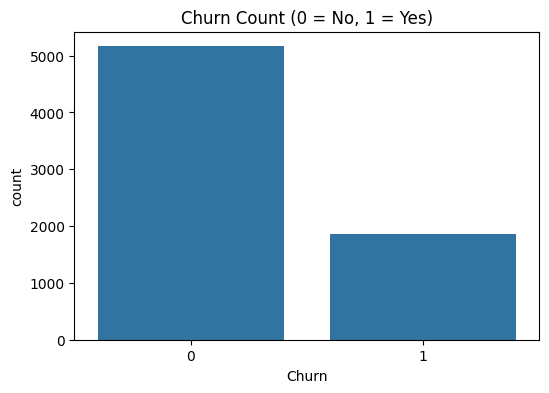

In [64]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Count (0 = No, 1 = Yes)")
plt.show()

Churn by Contract Type

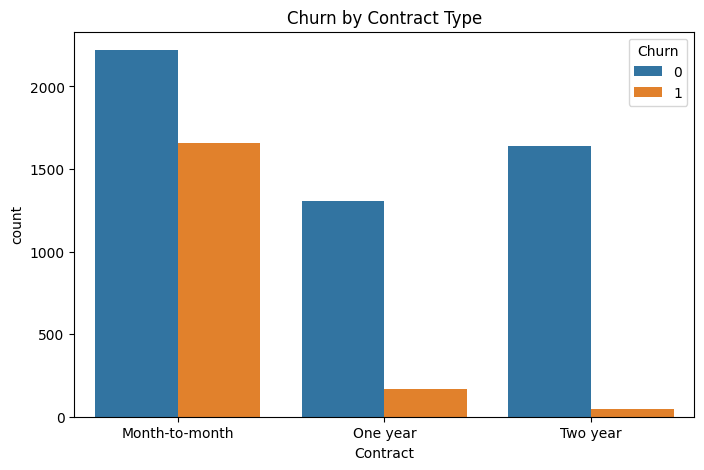

In [65]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

Correlation Heatmap

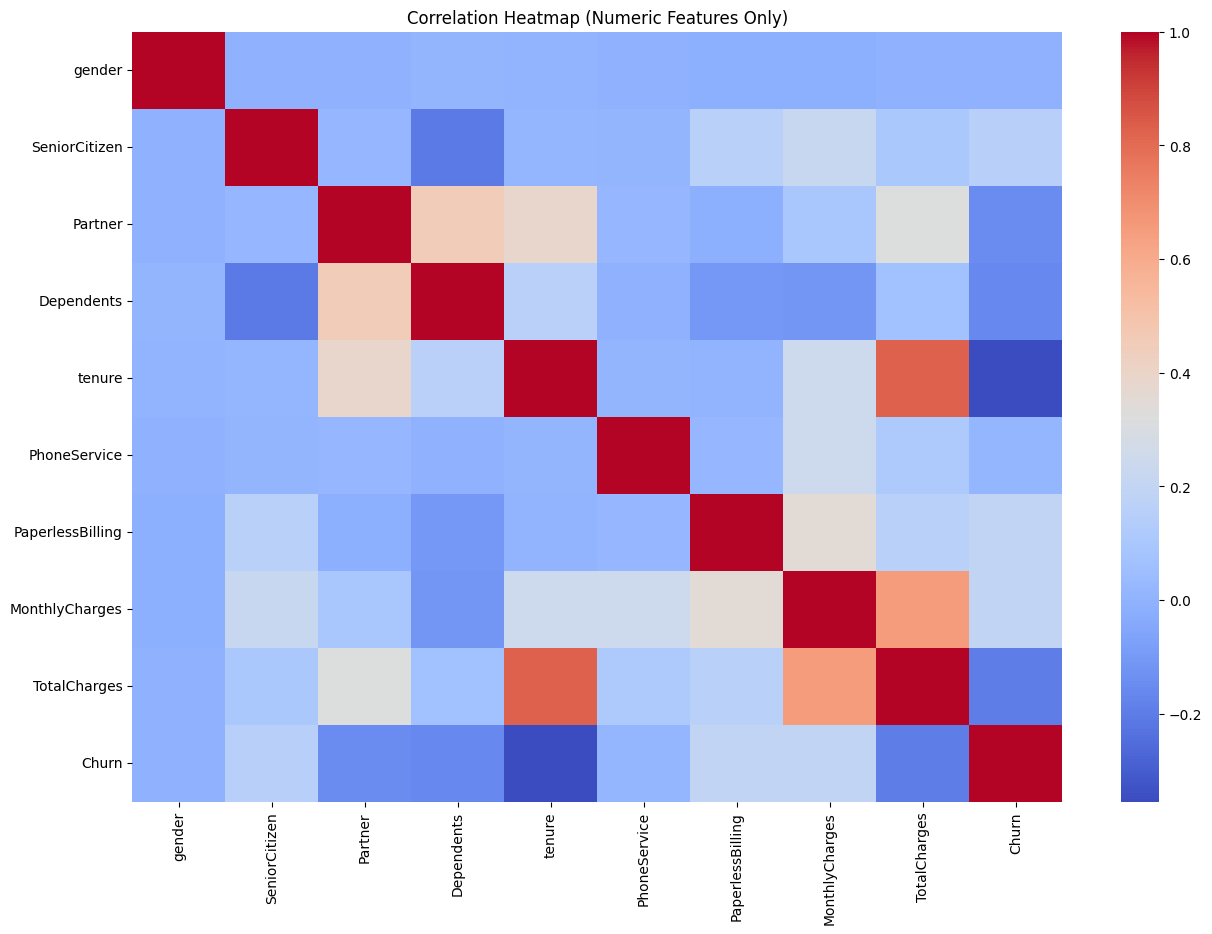

In [66]:
# Only select numeric columns for correlation matrix
numeric_df = df_encoded.select_dtypes(include=[np.number])

# Heatmap of correlations
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# Phase 3: Model Building & Evaluation

Train-Test Split

In [67]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print("-" * 50)

Training set size: (5625, 30)
Test set size: (1407, 30)
--------------------------------------------------


Random Forest Model Training

In [68]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

print(f" Random Forest trained in {end_time - start_time:.2f} seconds")
print("-" * 50)

 Random Forest trained in 0.87 seconds
--------------------------------------------------


Model Evaluation

In [69]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Classification report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.79      0.78      1407



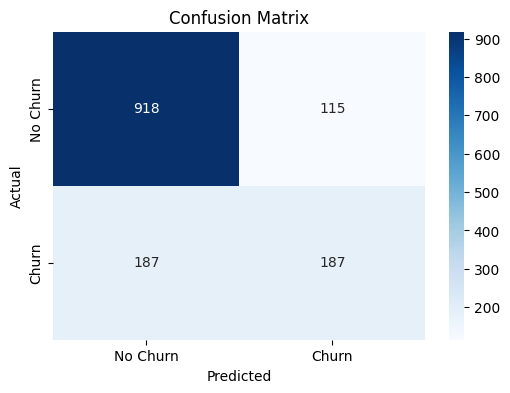

In [70]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [71]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy Score: {accuracy:.4f}")

 Accuracy Score: 0.7854


In [72]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f" ROC-AUC Score: {roc_auc:.4f}")

 ROC-AUC Score: 0.8150


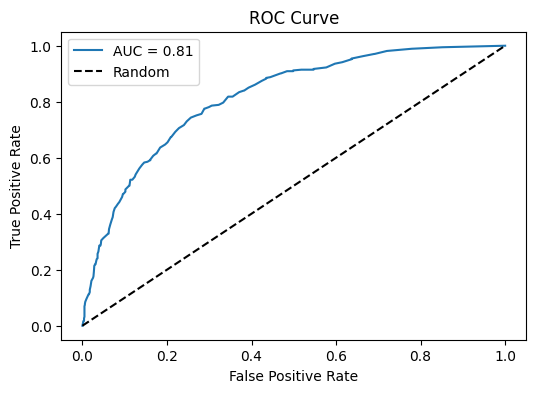

In [73]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Cross-Validation Accuracy

In [74]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f" Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print("-" * 50)

 Cross-Validation Accuracy (5-fold): 0.7901 ± 0.0097
--------------------------------------------------


Feature Importance

In [75]:
importances = rf_model.feature_importances_
features = X.columns
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False).head(15)

C:\Users\Tab & Tech\AppData\Local\Temp\ipykernel_15868\3840877709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


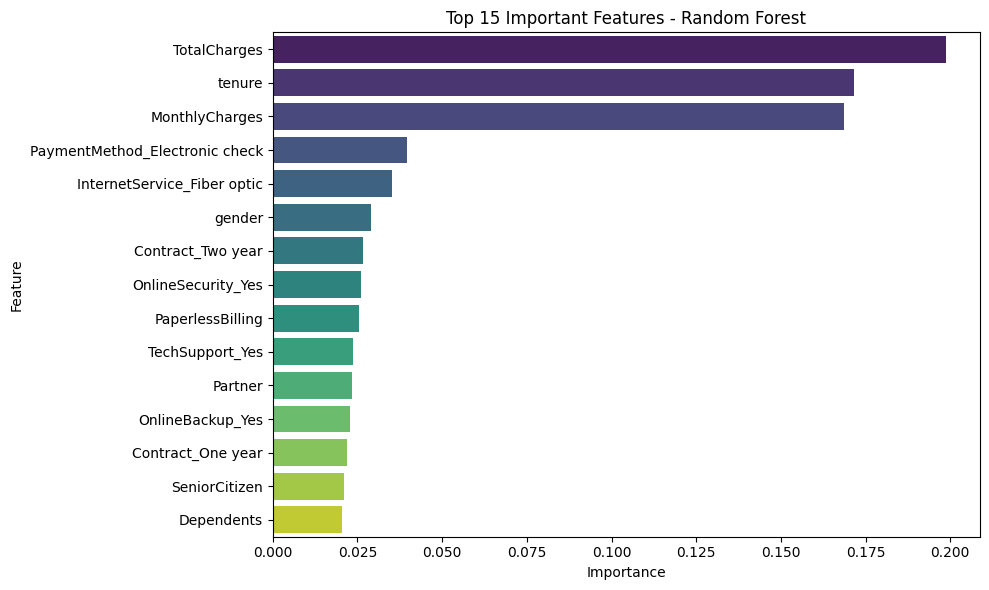

In [76]:
# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title("Top 15 Important Features - Random Forest")
plt.tight_layout()
plt.show()

Predict on New Customer Data (Interactive Input)

In [77]:
expected_columns = list(X_train.columns)

In [78]:
print("Please provide customer details for churn prediction:")

# Basic numerical features
tenure = int(input("Tenure (in months): "))
monthly_charges = float(input("Monthly Charges: "))
total_charges = float(input("Total Charges: "))

# Binary categorical features (map to 0/1)
gender = int(input("Gender (0 = Female, 1 = Male): "))
partner = int(input("Partner (0 = No, 1 = Yes): "))
dependents = int(input("Dependents (0 = No, 1 = Yes): "))
phone_service = int(input("Phone Service (0 = No, 1 = Yes): "))
paperless_billing = int(input("Paperless Billing (0 = No, 1 = Yes): "))

# Multi-class encoded as binary columns (one-hot)
# MultipleLines
ml_choice = input("Multiple Lines (None, Yes, No phone service): ").strip().lower()
ml_yes = int(ml_choice == "yes")
ml_nophone = int(ml_choice == "no phone service")

# Internet Service
is_choice = input("Internet Service (DSL, Fiber optic, No): ").strip().lower()
is_fiber = int(is_choice == "fiber optic")
is_no = int(is_choice == "no")

# Online Security
os_choice = input("Online Security (Yes, No): ").strip().lower()
os_yes = int(os_choice == "yes")
os_no = int(os_choice == "no")

# Online Backup
ob_choice = input("Online Backup (Yes, No): ").strip().lower()
ob_yes = int(ob_choice == "yes")
ob_no = int(ob_choice == "no")

# Device Protection
dp_choice = input("Device Protection (Yes, No): ").strip().lower()
dp_yes = int(dp_choice == "yes")
dp_no = int(dp_choice == "no")

# Tech Support
ts_choice = input("Tech Support (Yes, No): ").strip().lower()
ts_yes = int(ts_choice == "yes")
ts_no = int(ts_choice == "no")

# Streaming TV
stv_choice = input("Streaming TV (Yes, No): ").strip().lower()
stv_yes = int(stv_choice == "yes")
stv_no = int(stv_choice == "no")

# Streaming Movies
sm_choice = input("Streaming Movies (Yes, No): ").strip().lower()
sm_yes = int(sm_choice == "yes")
sm_no = int(sm_choice == "no")

# Contract
contract = input("Contract (Month-to-month, One year, Two year): ").strip().lower()
contract_one = int(contract == "one year")
contract_two = int(contract == "two year")

# Payment Method
pm = input(" Method (Electronic check, Mailed check, Bank transfer, Credit card): ").strip().lower()
pm_credit = int(pm == "credit card")
pm_echeck = int(pm == "electronic check")
pm_mail = int(pm == "mailed check")


Please provide customer details for churn prediction:


In [79]:
# Step 2: Construct input DataFrame
user_data = pd.DataFrame([{
    'tenure': tenure,
    'MonthlyCharges': monthly_charges,
    'TotalCharges': total_charges,
    'gender': gender,
    'Partner': partner,
    'Dependents': dependents,
    'PhoneService': phone_service,
    'PaperlessBilling': paperless_billing,
    'MultipleLines_No phone service': ml_nophone,
    'MultipleLines_Yes': ml_yes,
    'InternetService_Fiber optic': is_fiber,
    'InternetService_No': is_no,
    'OnlineSecurity_No': os_no,
    'OnlineSecurity_Yes': os_yes,
    'OnlineBackup_No': ob_no,
    'OnlineBackup_Yes': ob_yes,
    'DeviceProtection_No': dp_no,
    'DeviceProtection_Yes': dp_yes,
    'TechSupport_No': ts_no,
    'TechSupport_Yes': ts_yes,
    'StreamingTV_No': stv_no,
    'StreamingTV_Yes': stv_yes,
    'StreamingMovies_No': sm_no,
    'StreamingMovies_Yes': sm_yes,
    'Contract_One year': contract_one,
    'Contract_Two year': contract_two,
    'PaymentMethod_Credit card (automatic)': pm_credit,
    'PaymentMethod_Electronic check': pm_echeck,
    'PaymentMethod_Mailed check': pm_mail
}])

In [80]:
# Step 3: Handle any missing columns
missing_cols = set(expected_columns) - set(user_data.columns)
for col in missing_cols:
    user_data[col] = 0

In [81]:
# Step 4: Reorder to match training data
user_data = user_data[expected_columns]

In [82]:
# Step 5: Predict
churn_prediction = rf_model.predict(user_data)[0]
churn_proba = rf_model.predict_proba(user_data)[0][1]

In [83]:
# Step 6: Output Result
print("\n🔮 Prediction Result:")
print(f"➡️ Prediction: {'Churn' if churn_prediction == 1 else 'Not Churn'}")
print(f"📊 Churn Probability: {churn_proba:.2%}")


🔮 Prediction Result:
➡️ Prediction: Not Churn
📊 Churn Probability: 34.00%
